<a href="https://colab.research.google.com/github/TeigenMillies/MAT422/blob/main/3_2_Continunity_and_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2 Continunity and Differentiation
---------------------------------------------------------
- Limits and continuity
- Derivatives
- Taylor’s theorem

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 3.2.1. Limits and continuity

Limits are essential to calculus and mathematical analysis, and are used to
define continuity, derivatives, and integrals. In this chapter, we will use the Euclidean norm

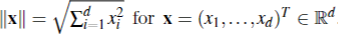

A point x ∈ Rd is a limit point (or accumulation point) of a set A ⊆ Rd if
every open ball around x contains an element a of A such that a ̸ = x as in
Figure 3.1. A set A is closed if every limit point of A belongs to A. A set A
is open if there is a Br(x) ⊆ A for all x ∈ A as in Figure 3.2. A set A ⊆ Rd is
bounded if there exists an r > 0 such that A ⊆ Br(0), where 0 = (0, . . . , 0)T

Limits of a function Let f : D → R be a real-valued function on D ⊆ Rd . Then f is said to have a limit L ∈ R as x approaches a if: for any ε > 0, there exists a δ > 0 such that | f (x)−L| < ε for all x ∈ D∩B δ (a)\{a}. This is written as

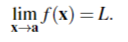

Continuous function is a function that does not have any abrupt changes
in value, known as discontinuities. The definition of continuity of a function
can be visualized in Figure 3.3. Note that we explicitly exclude a itself from having to satisfy the condition | f (x) − L| < ε. In particular, we may have f (a) ̸ = L. We also do not restrict a to be in D.

Let f : D → R be a real-valued function on D ⊆ Rd . Then f is said to be continuous at a ∈ D if

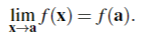

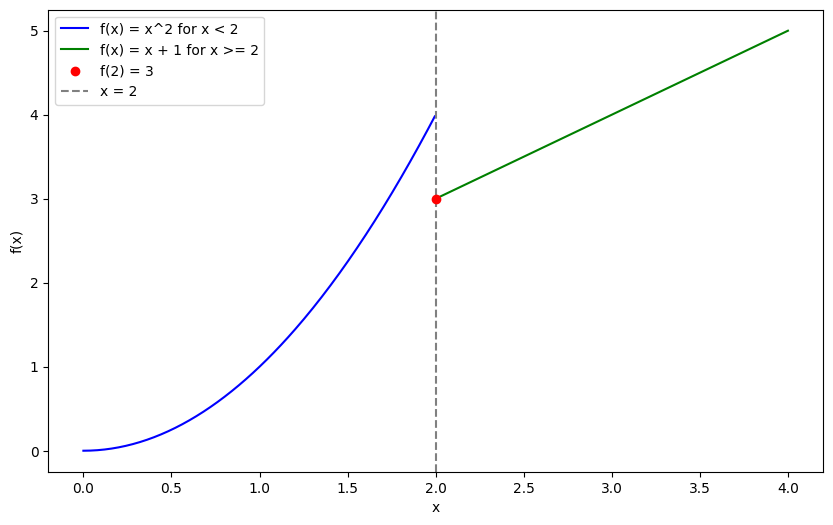

In [3]:
# Piecewise function that is discontinuous at x = 2
def f(x):
    return np.where(x < 2, x**2, x + 1)

# Functions to find limit from left and right
def limit_left(x_values):
    return x_values**2

def limit_right(x_values):
    return x_values + 1

# Functions value at x = 2
def f_at_2():
    return 2 + 1  # Since the function defines f(x) = x + 1 for x >= 2

# Generate x values
x = np.linspace(0, 4, 400)

# Plot to show continuity and discontinuity at x = 2
plt.figure(figsize=(10, 6))

# Plot for x < 2
plt.plot(x[x < 2], limit_left(x[x < 2]), color='blue', label='f(x) = x^2 for x < 2')

# Plot for x >= 2
plt.plot(x[x >= 2], limit_right(x[x >= 2]), color='green', label='f(x) = x + 1 for x >= 2')

# Highlight the point of discontinuity at x = 2
plt.scatter(2, f_at_2(), color='red', zorder=5, label='f(2) = 3')


plt.xlabel("x")
plt.ylabel("f(x)")
plt.axvline(x=2, color='gray', linestyle='--', label='x = 2')
plt.legend()
plt.show()



# 3.2.2. Derivatives
The derivative of a function of a real variable measures the sensitivity to
change of the function value (output value) with respect to another variable.


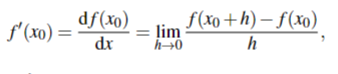

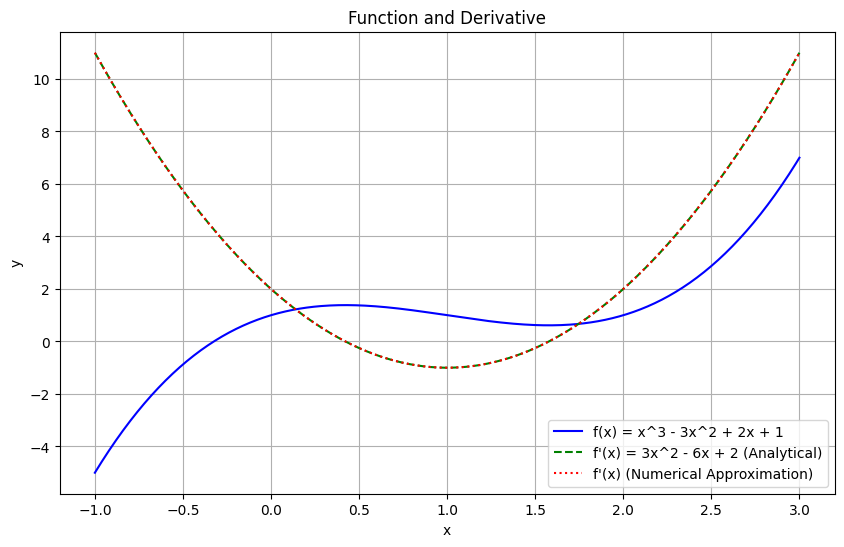

In [4]:
# Function f(x)
def f(x):
    return x**3 - 3*x**2 + 2*x + 1

# Analytical derivative of f(x)
def f_derivative(x):
    return 3*x**2 - 6*x + 2

# Approximate the derivative
def derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

# Generate x values and compute the function values and derivatives
x = np.linspace(-1, 3, 400)
y = f(x)
y_derivative = f_derivative(x)
y_numerical_derivative = derivative(f, x)  # Numerical derivative approximation

# Plot function and derivative
plt.figure(figsize=(10, 6))

# Plot f(x)
plt.plot(x, y, label="f(x) = x^3 - 3x^2 + 2x + 1", color="blue")

# Plot analytical derivative f'(x)
plt.plot(x, y_derivative, label="f'(x) = 3x^2 - 6x + 2 (Analytical)", color="green", linestyle="--")

# Plot numerical derivative approximation
plt.plot(x, y_numerical_derivative, label="f'(x) (Numerical Approximation)", color="red", linestyle=":")

# Formatting
plt.title("Function and Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# 3.2.3. Taylor’s theorem
Taylor’s theorem gives an approximation of a differentiable function around
a given point by a polynomial. We will make use of Taylor’s Theorem, a powerful generalization of the Mean Value Theorem that provides polynomial
approximations to a function around a point. We restrict ourselves to the case
of a linear approximation with second-order error term, which will suffice for
our purposes.

Theorem (Taylor) Let f : D → R where D ⊆ R. Suppose f has a m
times continuous derivative on [a, b]. Then

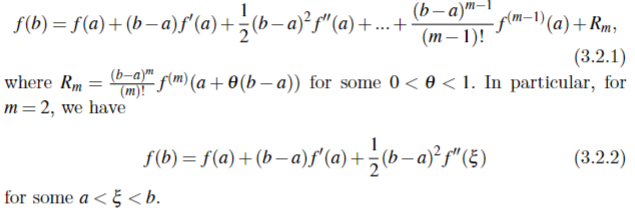



<ipython-input-4-c3191c6ad30a>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  approx += f_derivative(i, a) * (x - a)**i / np.math.factorial(i)


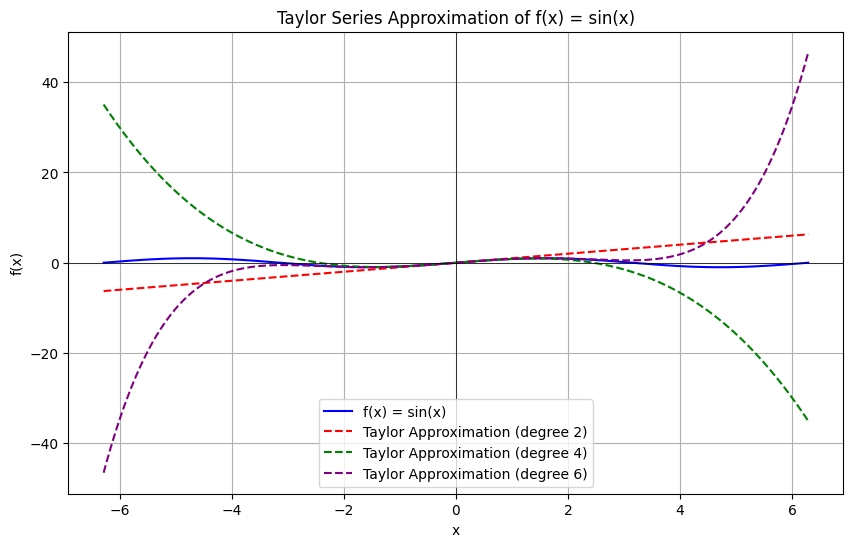

In [4]:
# Function f(x) = sin(x)
def f(x):
    return np.sin(x)

# Derivatives of f(x) for Taylor expansion around x = 0
def f_derivative(n, x):
    # Derivatives of sin(x) rotate between sin, cos, -sin, -cos
    if n % 4 == 0:
        return np.sin(x)
    elif n % 4 == 1:
        return np.cos(x)
    elif n % 4 == 2:
        return -np.sin(x)
    elif n % 4 == 3:
        return -np.cos(x)

# Taylor series approximation up to n terms at x = a
def taylor_series(x, a, n):
    approx = 0
    for i in range(n + 1):
        approx += f_derivative(i, a) * (x - a)**i / np.math.factorial(i)
    return approx

# x values and compute the function value
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y_true = f(x)

# Compute Taylor series approximations of increasing degree (2, 4, 6)
y_taylor_2 = taylor_series(x, 0, 2)
y_taylor_4 = taylor_series(x, 0, 4)
y_taylor_6 = taylor_series(x, 0, 6)

# Plot
plt.figure(figsize=(10, 6))

# Plot true function
plt.plot(x, y_true, label="f(x) = sin(x)", color="blue")

# Plot Taylor approximations to compare
plt.plot(x, y_taylor_2, label="Taylor Approximation (degree 2)", color="red", linestyle="--")
plt.plot(x, y_taylor_4, label="Taylor Approximation (degree 4)", color="green", linestyle="--")
plt.plot(x, y_taylor_6, label="Taylor Approximation (degree 6)", color="purple", linestyle="--")

# Formatting
plt.title("Taylor Series Approximation of f(x) = sin(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()
